In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import numpy as np
from numpy import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline


In [2]:
#LEITURA DO ARQUIVO

df = pd.read_excel("dados.xlsx").set_index('DATA')


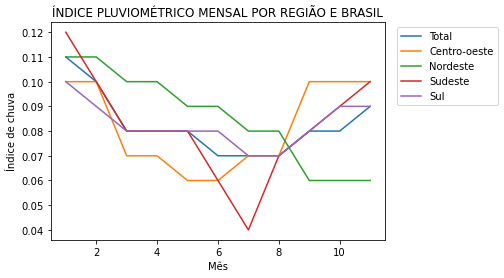

In [3]:
#GRÁFICO DE CHUVAS POR MÊS EM UM ANO

colunas_chuva = ['PLUVI_BR', 'PLUVI_CO', 'PLUVI_NE', 'PLUVI_SE', 'PLUVI_S']
etiquetas_chuva = ['Total', 'Centro-oeste', 'Nordeste', 'Sudeste', 'Sul']

fig, chuva = plt.subplots()
for i in range(len(colunas_chuva)):
    chuva.plot(df['MES'][0:11], df[colunas_chuva[i]][0:11], label = etiquetas_chuva[i])
chuva.set_xlabel('Mês')
chuva.set_ylabel('Índice de chuva')
chuva.set_title('ÍNDICE PLUVIOMÉTRICO MENSAL POR REGIÃO E BRASIL')
chuva.legend(bbox_to_anchor = (0.35, 1, 1, 0))
plt.show()


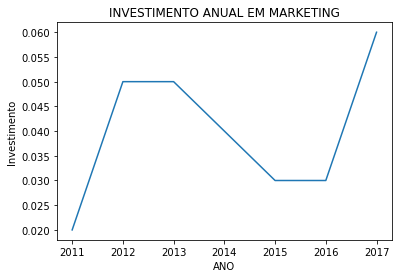

In [4]:
#GRÁFICO DE INVESTIMENTO EM MARKETING AO LONGO DOS ANOS

mkt = df[['ANO', 'MARKETING']].drop_duplicates().reset_index(drop=True)

fig, marketing = plt.subplots()
marketing.plot(mkt['ANO'], mkt['MARKETING'])
marketing.set_xlabel('ANO')
marketing.set_ylabel('Investimento')
marketing.set_title('INVESTIMENTO ANUAL EM MARKETING')
plt.show()


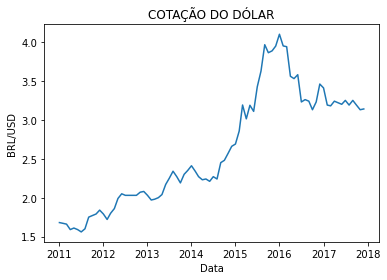

In [5]:
#GRÁFICO DE COTAÇÃO DO DÓLAR AO LONGO DOS ANOS

colunas_dolar = ['DOLAR']

fig, dolar = plt.subplots()
for i in range(len(colunas_dolar)):
    dolar.plot(df[colunas_dolar[i]])
dolar.set_xlabel('Data')
dolar.set_ylabel('BRL/USD')
dolar.set_title('COTAÇÃO DO DÓLAR')
plt.show()


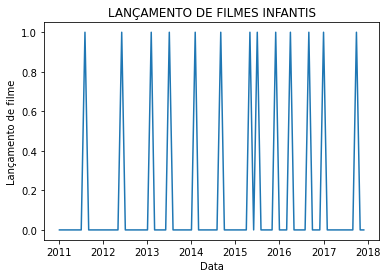

In [6]:
#GRÁFICO DE LANÇAMENTOS DE FILMES AO LONGO DOS ANOS

fig, chuva = plt.subplots()
chuva.plot(df['LANCAMENTO_FILME'])
chuva.set_xlabel('Data')
chuva.set_ylabel('Lançamento de filme')
chuva.set_title('LANÇAMENTO DE FILMES INFANTIS')
plt.show()


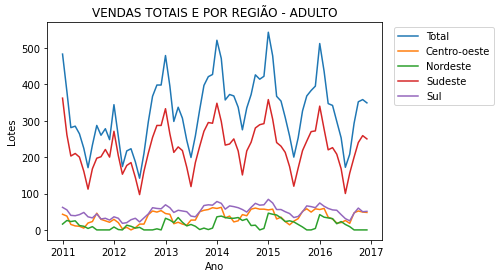

In [7]:
#GRÁFICO DE VENDAS ADULTO POR REGIÃO

colunas_adulto = ['ADULTO_BR', 'ADULTO_CO', 'ADULTO_NE', 'ADULTO_SE', 'ADULTO_S']
etiquetas_adulto = ['Total', 'Centro-oeste', 'Nordeste', 'Sudeste', 'Sul']

fig, vendas_adulto = plt.subplots()
for i in range(len(colunas_adulto)):
    vendas_adulto.plot(df[colunas_adulto[i]], label = etiquetas_adulto[i])
vendas_adulto.set_xlabel('Ano')
vendas_adulto.set_ylabel('Lotes')
vendas_adulto.set_title('VENDAS TOTAIS E POR REGIÃO - ADULTO')
vendas_adulto.legend(bbox_to_anchor = (0.35, 1, 1, 0))
plt.show()


In [8]:
#CÁLCULO DA PARTICIPAÇÃO DE CADA REGIÃO NAS VENDAS ADULTO NO PERÍODO ANALISADO

total_vendas = df[colunas_adulto].sum()
print('PARTICIPAÇÃO DA CADA REGIÃO NO TOTAL DE VENDAS ADULTO(%)')
percentual_vendas = total_vendas[1:] / total_vendas[0]*100
print(percentual_vendas)


PARTICIPAÇÃO DA CADA REGIÃO NO TOTAL DE VENDAS ADULTO(%)
ADULTO_CO    10.638388
ADULTO_NE     4.717783
ADULTO_SE    69.096396
ADULTO_S     15.547433
dtype: float64


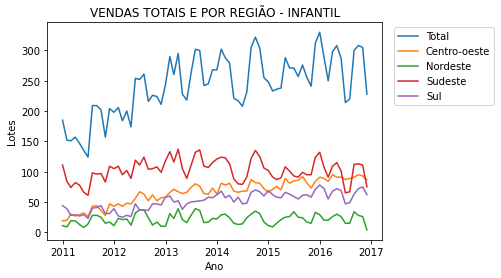

In [9]:
#GRÁFICO DE VENDAS INFANTIL POR REGIÃO

colunas_infantil = ['INFANTIL_BR', 'INFANTIL_CO', 'INFANTIL_NE', 'INFANTIL_SE', 'INFANTIL_S']
etiquetas_infantil = ['Total', 'Centro-oeste', 'Nordeste', 'Sudeste', 'Sul']

fig, vendas_infantil = plt.subplots()
for i in range(len(colunas_infantil)):
    vendas_infantil.plot(df[colunas_infantil[i]], label = etiquetas_infantil[i])
vendas_infantil.set_xlabel('Ano')
vendas_infantil.set_ylabel('Lotes')
vendas_infantil.set_title('VENDAS TOTAIS E POR REGIÃO - INFANTIL')
vendas_infantil.legend(bbox_to_anchor = (0.35, 1, 1, 0))
plt.show()


In [10]:
#CÁLCULO DA PARTICIPAÇÃO DE CADA REGIÃO NAS VENDAS INFANTIS NO PERÍODO ANALISADO

total_vendas = df[colunas_infantil].sum()
print('PARTICIPAÇÃO DA CADA REGIÃO NO TOTAL DE VENDAS INFANTIL (%)')
percentual_vendas = total_vendas[1:] / total_vendas[0]*100
print(percentual_vendas)


PARTICIPAÇÃO DA CADA REGIÃO NO TOTAL DE VENDAS INFANTIL (%)
INFANTIL_CO    27.344600
INFANTIL_NE     9.023203
INFANTIL_SE    42.377542
INFANTIL_S     21.254655
dtype: float64


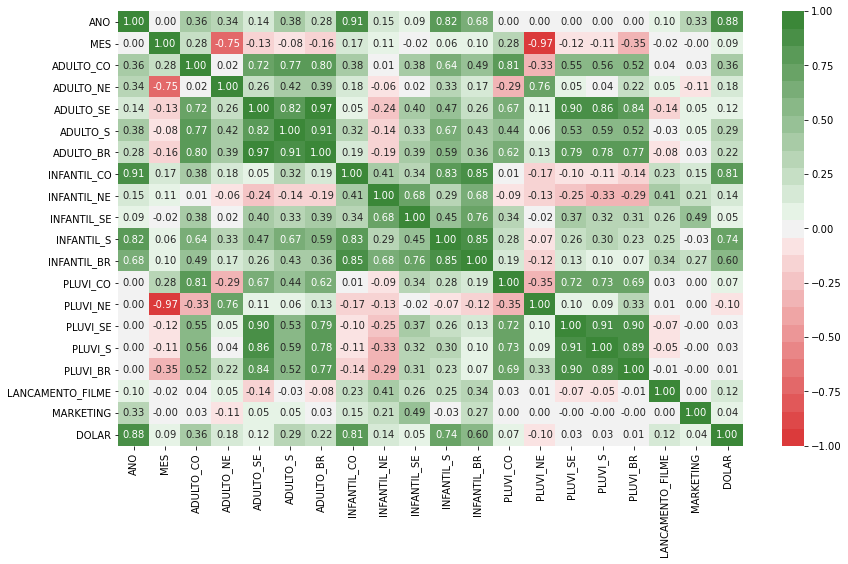

In [11]:
'''
CORRELAÇÕES - ADULTO
colunas
'ANO', 'MES', 'ADULTO_CO', 'ADULTO_NE', 'ADULTO_SE', 'ADULTO_S', 'ADULTO_BR', 'INFANTIL_CO', 'INFANTIL_NE', 'INFANTIL_SE', 'INFANTIL_S', 'INFANTIL_BR', 'PLUVI_CO', 'PLUVI_NE', 'PLUVI_SE', 'PLUVI_S', 'PLUVI_BR', 'LANCAMENTO_FILME', 'MARKETING', 'DOLAR'
'''

corr_var = ['ANO', 'MES', 'ADULTO_CO', 'ADULTO_NE', 'ADULTO_SE', 'ADULTO_S', 'ADULTO_BR', 'INFANTIL_CO', 'INFANTIL_NE', 'INFANTIL_SE', 'INFANTIL_S', 'INFANTIL_BR', 'PLUVI_CO', 'PLUVI_NE', 'PLUVI_SE', 'PLUVI_S', 'PLUVI_BR', 'LANCAMENTO_FILME', 'MARKETING', 'DOLAR']
correlacao = df[corr_var].corr()

# mask = np.triu(np.ones_like(correlacao, dtype=np.bool))
mask = np.zeros_like(correlacao, dtype=np.bool)
cmap = sns.diverging_palette(12, 127, n=25)
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, mask=mask, ax=ax)
plt.show()


In [12]:
#CORRELAÇÕES RELEVANTES
exog_ADULTO_CO = ['PLUVI_CO']
exog_ADULTO_NE = ['PLUVI_NE', 'MES']
exog_ADULTO_SE = ['PLUVI_SE', 'PLUVI_S', 'PLUVI_BR', 'ANO']
exog_ADULTO_S = ['PLUVI_SE', 'PLUVI_S', 'PLUVI_BR']
exog_ADULTO_BR = ['PLUVI_SE', 'PLUVI_S', 'PLUVI_BR']
exog_INFANTIL_CO = ['DOLAR', 'ANO']
exog_INFANTIL_NE = ['LANCAMENTO_FILME']
exog_INFANTIL_SE = ['MARKETING']
exog_INFANTIL_S = ['DOLAR', 'ANO']
exog_INFANTIL_BR = ['DOLAR', 'ANO']


In [13]:
#ESCOLHA DA SÉRIE QUE SERÁ ESTUDADA

# serie_col = 'ADULTO_CO'
# serie_col = 'ADULTO_NE'
# serie_col = 'ADULTO_SE'
# serie_col = 'ADULTO_S'
serie_col = 'ADULTO_BR'
# serie_col = 'INFANTIL_CO'
# serie_col = 'INFANTIL_NE'
# serie_col = 'INFANTIL_SE'
# serie_col = 'INFANTIL_S'
# serie_col = 'INFANTIL_BR'

serie = df[df['ANO'] <= 2016][serie_col]


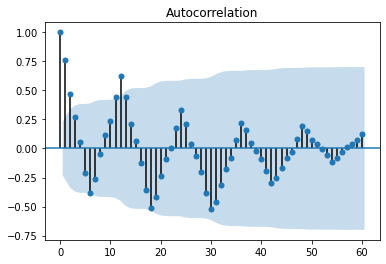

In [14]:
#GRÁFICO DE AUTOCORRELAÇÃO DA SÉRIE

fig, auto_corr = plt.subplots()
plot_acf(serie, lags=60, ax=auto_corr)
plt.show()


In [15]:
#DECOMPOSIÇÃO DA SÉRIE EM TENDÊNCIA, SAZONALIDADE E RUÍDO

decomp = seasonal_decompose(serie, model='aditive', freq=12)


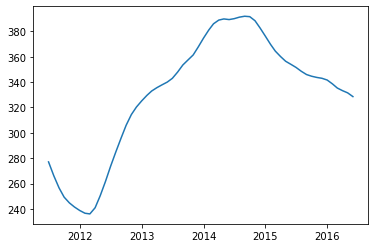

In [16]:
#GRÁFICO DA TEDÊNCIA DA SÉRIE

fig, tendencia = plt.subplots()
plt.plot(decomp.trend)
plt.show()


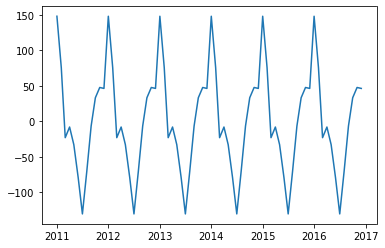

In [17]:
#GRÁFICO DA SAZONALIDADE DA SÉRIE

fig, tendencia = plt.subplots()
plt.plot(decomp.seasonal)
plt.show()


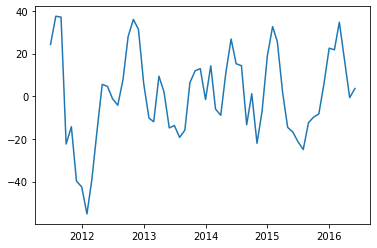

In [18]:
#GRÁFICO DO RUÍDO DA SÉRIE

fig, tendencia = plt.subplots()
plt.plot(decomp.resid)
plt.show()


In [19]:
#SPERARAÇÃO DOS DADOS

lim_treino = 2015 #divisão dos dados de treino e de validação
exogenas_col = eval('exog_' + serie_col)

treino = df[df['ANO'] <= lim_treino]
teste_previsao = df[df['ANO'] > lim_treino]

treino_serie = treino[serie_col]
teste_previsao_serie = teste_previsao[serie_col]

treino_exog = treino[exogenas_col]
teste_previsao_exog = teste_previsao[exogenas_col]


In [20]:
#FUNÇÃO COM O MODELO PRÉ-CONFIGURADO

def sarimax(treino_serie, treino_exog, teste_previsao_exog, m, trend, information_criterion, stepwise,
            prazo = int((df['ANO'].max() - lim_treino) * 12), out_of_sample_size=12,
            max_order=None, start_p = 0, start_q = 0, start_d = 0, max_p=7, max_q=7, max_d = 2,
            seasonal = True, start_P = 0, start_Q = 0, start_D = 0, max_P=5, max_Q=5, max_D=2,
            n_jobs=-1, suppress_warnings=True):
    
    tempo_inicial = time.time()

    modelo = auto_arima(treino_serie, exogenous=treino_exog, m=m, stationary = False,
                        max_order=max_order, start_p = start_p, start_q = start_q, start_d = start_d, max_p=max_p, max_q=max_q, max_d=max_d,
                        seasonal = seasonal, start_P = start_P, start_Q = start_Q, start_D = start_D, max_P=max_P, max_Q=max_Q, max_D=max_D,
                        n_jobs=n_jobs, trend=trend,
                        information_criterion=information_criterion, out_of_sample_size=out_of_sample_size, stepwise=stepwise, suppress_warnings=suppress_warnings)
    
    resultado = modelo.predict(n_periods=prazo, exogenous=teste_previsao_exog)
    #print(modelo.summary())

    tempo_final = time.time()
    tempo_total = tempo_final - tempo_inicial

    return modelo, resultado, tempo_total


In [21]:
#PARÂMETROS MUTÁVEIS USADOS NOS MODELOS

m = 12
trend = 'c'
information_criterion = 'oob' #aic, bic, hqic, oob
stepwise = True


In [22]:
#MODELO SEM VARIÁVEIS EXÓGENAS

[modelo_serie, previsao_serie, tempo_serie] = modelo_serie = sarimax(treino_serie, None, None, m, trend, information_criterion, stepwise)

resultado_serie = teste_previsao[['ANO', 'MES']]
resultado_serie[serie_col + '_PREVISTO'] = previsao_serie.tolist()
df_serie = df[['ANO', 'MES', serie_col]]

resultado_serie = pd.merge(df_serie, resultado_serie, how='outer')
resultado_serie.index = df.index


In [23]:
#MODELO COM VARIÁVEIS EXÓGENAS

[modelo_exog, previsao_exog, tempo_exog] = sarimax(treino_serie, treino_exog[exogenas_col], teste_previsao_exog[exogenas_col], m, trend, information_criterion, stepwise)

resultado_exog = teste_previsao[['ANO', 'MES']]
resultado_exog[serie_col + '_PREVISTO'] = previsao_exog.tolist()
df_exog = df[['ANO', 'MES', serie_col]]

resultado_exog = pd.merge(df_exog, resultado_exog, how='outer')
resultado_exog.index = df.index


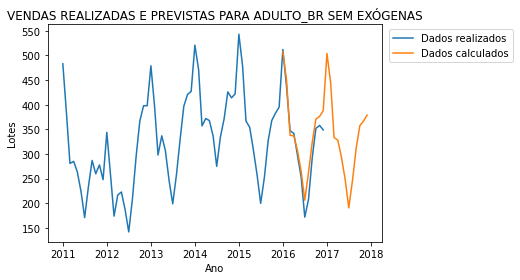

In [24]:
#GRÁFICO DA SÉRIE SEM EXÓGENAS

colunas_resultado_serie = [serie_col, serie_col + '_PREVISTO']
etiquetas_resultado_serie = ['Dados realizados', 'Dados calculados']

fig, grafico_resultado_serie = plt.subplots()
for i in range(len(colunas_resultado_serie)):
    grafico_resultado_serie.plot(resultado_serie[colunas_resultado_serie[i]], label = etiquetas_resultado_serie[i])
grafico_resultado_serie.set_xlabel('Ano')
grafico_resultado_serie.set_ylabel('Lotes')
grafico_resultado_serie.set_title('VENDAS REALIZADAS E PREVISTAS PARA ' + serie_col + ' SEM EXÓGENAS')
grafico_resultado_serie.legend(bbox_to_anchor = (0.35, 1, 1.055, 0))
plt.show()


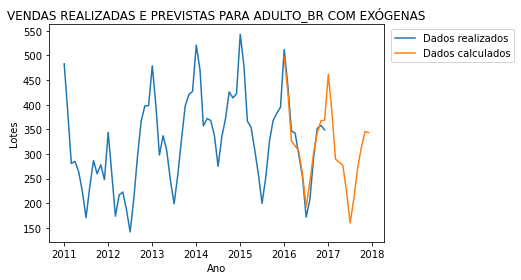

In [25]:
#GRÁFICO DA SÉRIE COM EXÓGENAS

colunas_resultado_exog = [serie_col, serie_col + '_PREVISTO']
etiquetas_resultado_exog = ['Dados realizados', 'Dados calculados']

fig, grafico_resultado_exog = plt.subplots()
for i in range(len(colunas_resultado_exog)):
    grafico_resultado_exog.plot(resultado_exog[colunas_resultado_exog[i]], label = etiquetas_resultado_exog[i])
grafico_resultado_exog.set_xlabel('Ano')
grafico_resultado_exog.set_ylabel('Lotes')
grafico_resultado_exog.set_title('VENDAS REALIZADAS E PREVISTAS PARA ' + serie_col + ' COM EXÓGENAS')
grafico_resultado_exog.legend(bbox_to_anchor = (0.35, 1, 1.055, 0))
plt.show()


In [26]:
delta_tempo = tempo_exog - tempo_serie
percentual_tempo = delta_tempo / tempo_serie

print(f'SEM variáveis exógenas: {tempo_serie:.1f} segundos')
print(f'COM variáveis exógenas: {tempo_exog:.1f} segundos\n')

if delta_tempo > 0:
    print(f'As variáveis exógenas necessitam de {delta_tempo:.1f} segundos a mais.')
elif delta_tempo < 0:
    print(f'As variáveis exógenas necessitam de {abs(delta_tempo):.1f} segundos a menos.')
else:
    print(f'Os tempos de execução com e sem variáveis exógenas são iguais.')

if delta_tempo > 0:
    print(f'Isso representa um acréscimo de {percentual_tempo:.0%} no tempo de execução.')
elif delta_tempo < 0:
    print(f'Isso representa um decréscimo de {abs(percentual_tempo):.0%} no tempo de execução.')


SEM variáveis exógenas: 2.9 segundos
COM variáveis exógenas: 9.3 segundos

As variáveis exógenas necessitam de 6.4 segundos a mais.
Isso representa um acréscimo de 220% no tempo de execução.


In [27]:
#CÁLCULO DOS ERROS NO PERÍODO DE VALIDAÇÃO

inicio_validacao = lim_treino + 1
fim_validacao = df.dropna()['ANO'].max()

df_erro_serie = resultado_serie[(resultado_serie['ANO'] >= inicio_validacao) & (resultado_serie['ANO'] <= fim_validacao)]
df_erro_serie['ERRO'] = df_erro_serie[serie_col] - df_erro_serie[serie_col + '_PREVISTO']

df_erro_exog = resultado_exog[(resultado_exog['ANO'] >= inicio_validacao) & (resultado_exog['ANO'] <= fim_validacao)]
df_erro_exog['ERRO'] = df_erro_exog[serie_col] - df_erro_exog[serie_col + '_PREVISTO']


In [28]:
#CÁLCULO DAS MÉTRICAS DE ERRO NO PERÍODO DE VALIDAÇÃO PARA PREVISÃO SEM VARIÁVEIS EXÓGENAS

vies_serie = df_erro_serie['ERRO'].mean()
mae_serie = abs(df_erro_serie['ERRO']).mean()
mape_serie = abs(df_erro_serie['ERRO']).sum() / df_erro_serie[serie_col].sum()
mse_serie = (df_erro_serie['ERRO']**2).mean()
rmse_serie = mse_serie**.5

vies_exog = df_erro_exog['ERRO'].mean()
mae_exog = abs(df_erro_exog['ERRO']).mean()
mape_exog = abs(df_erro_exog['ERRO']).sum() / df_erro_exog[serie_col].sum()
mse_exog = (df_erro_exog['ERRO']**2).mean()
rmse_exog = mse_exog**.5

lista_erros_serie = [vies_serie, mae_serie, mape_serie, mse_serie, rmse_serie]
lista_erros_exog = [vies_exog, mae_exog, mape_exog, mse_exog, rmse_exog]


In [29]:
#CÁLCULO DAS MÉTRICAS DE ERRO NO PERÍODO DE VALIDAÇÃO PARA PREVISÃO COM VARIÁVEIS EXÓGENAS

print('>> Métricas de adequação da curva SEM VARÁVEIS EXÓGENAS no período de validação. <<')
print(f'Viés: {vies_serie:.2f}')
print(f'Erro absoluto médio: {mae_serie:.2f}')
print(f'Erro percentual médio: {mape_serie:.2%}')
print(f'Erro quadrático médio: {mse_serie:.2f}')
print(f'Raiz do erro quadrático médio: {rmse_serie:.2f}')

print('\n>> Métricas de adequação da curva COM VARÁVEIS EXÓGENAS no período de validação. <<')
print(f'Viés: {vies_exog:.2f}')
print(f'Erro absoluto médio: {mae_exog:.2f}')
print(f'Erro percentual médio: {mape_exog:.2%}')
print(f'Erro quadrático médio: {mse_exog:.2f}')
print(f'Raiz do erro quadrático médio: {rmse_exog:.2f}')


>> Métricas de adequação da curva SEM VARÁVEIS EXÓGENAS no período de validação. <<
Viés: -17.65
Erro absoluto médio: 20.79
Erro percentual médio: 6.37%
Erro quadrático médio: 655.85
Raiz do erro quadrático médio: 25.61

>> Métricas de adequação da curva COM VARÁVEIS EXÓGENAS no período de validação. <<
Viés: -1.99
Erro absoluto médio: 16.02
Erro percentual médio: 4.90%
Erro quadrático médio: 328.77
Raiz do erro quadrático médio: 18.13


In [30]:
#PONTUAÇAO DAS MÉTRICAS DE ERRO

if len(lista_erros_serie) != len(lista_erros_exog):
    raise Exeption('Listas de erros com dimensões diferentes.')
else:
    sem_exog = 0
    com_exog = 0
    for i in range(0, len(lista_erros_serie)):
        if abs(lista_erros_serie[i]) > abs(lista_erros_exog[i]):
            com_exog+=1
        elif abs(lista_erros_serie[i]) < abs(lista_erros_exog[i]):
            sem_exog+=1
        else:
            com_exog+=1
            sem_exog+=1

print(f'Pontuação sem exógenas: {sem_exog}')
print(f'Pontuação com exógenas: {com_exog}\n')

if sem_exog >= com_exog:
    print('A previsão SEM VARIÁVEIS EXÓGENAS é mais próxima dos dados reais no período de validação.')
else:
    print('A previsão COM VARIÁVEIS EXÓGENAS é mais próxima dos dados reais no período de validação.')


Pontuação sem exógenas: 0
Pontuação com exógenas: 5

A previsão COM VARIÁVEIS EXÓGENAS é mais próxima dos dados reais no período de validação.
